In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('/content/drive/MyDrive/申万宏源/净值信息.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6612437 entries, 0 to 6612436
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Unnamed: 0      object
 1   SOURCE_CODE     object
 2   STATISTIC_DATE  object
 3   SWANAV          object
 4   FUND_ID         object
dtypes: object(5)
memory usage: 252.2+ MB


In [5]:
data1=pd.read_csv('/content/drive/MyDrive/申万宏源/产品信息.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,2,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293127 entries, 0 to 293126
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Unnamed: 0                 293127 non-null  object
 1   FUND_TYPE_HEDGING          293126 non-null  object
 2   IS_PRIVATE                 293126 non-null  object
 3   TERMINAL_STRATEGY          293097 non-null  object
 4   FUND_TYPE_INDEX            3539 non-null    object
 5   FOUNDATION_DATE            293126 non-null  object
 6   REG_CODE                   246766 non-null  object
 7   FUND_NAME                  293126 non-null  object
 8   FUND_TYPE_QUANT            293126 non-null  object
 9   FUND_TYPE_STRATEGY_LEVEL2  293126 non-null  object
 10  FUND_ID                    293126 non-null  object
 11  FUND_TYPE_STRATEGY_LEVEL1  293126 non-null  object
dtypes: object(12)
memory usage: 26.8+ MB


In [7]:
fund=pd.read_csv('/content/drive/MyDrive/申万宏源/股票多头量化非对冲.csv')

In [8]:
#转换成日期格式、数字格式
data['STATISTIC_DATE']=pd.to_datetime(data['STATISTIC_DATE'],format='%Y-%m-%d',errors='coerce')
data['SWANAV'] = pd.to_numeric(data['SWANAV'],errors='coerce')
data['FUND_ID']=pd.to_numeric(data['FUND_ID'],errors='coerce')

In [9]:
#有缺失值的行就删除
#初步清洗后的数据
data=data.dropna(how='any', axis = 0)

In [10]:
#fund['FUND_ID']=pd.to_numeric(fund['FUND_ID'])
fund['FUND_ID']=pd.to_numeric(fund['FUND_ID'],errors='coerce')
fund_data=pd.merge(fund,data,on='FUND_ID',how='left')
fund_data

,FUND_NAME,FUND_ID,Unnamed: 0,SOURCE_CODE,STATISTIC_DATE,SWANAV
0,若愚量化配置1期,141217,0,3,2017-04-07,0.9781
1,若愚量化配置1期,141217,0,3,2017-04-14,0.9546
2,若愚量化配置1期,141217,0,3,2017-04-21,0.9384
3,若愚量化配置1期,141217,0,3,2017-04-28,0.9373
4,若愚量化配置1期,141217,0,3,2017-05-05,0.9416
...,...,...,...,...,...,...
211457,润洲量化价值二号A,545924,0,1,2021-03-26,0.9826
211458,润洲量化价值二号A,545924,0,1,2021-04-02,0.9832
211459,润洲量化价值二号A,545924,0,1,2021-04-09,0.9951
211460,润洲量化价值二号A,545924,0,1,2021-04-16,0.9910


In [11]:
#统计“SWANAV”一列中有多少个值
fund_data["SWANAV"].value_counts()

1.0000    3729
0.9990     791
1.0010     699
1.0020     449
0.9980     441
          ... 
0.1193       1
0.1195       1
0.1223       1
0.1189       1
0.6313       1
Name: SWANAV, Length: 37818, dtype: int64

In [12]:
fund_data=fund_data.drop(index=fund_data[(fund_data.SWANAV == 0)].index.tolist())

In [13]:
fund_data=pd.DataFrame(fund_data,columns=['FUND_ID','FUND_NAME','STATISTIC_DATE','SWANAV'])

In [14]:
fund_data

,FUND_ID,FUND_NAME,STATISTIC_DATE,SWANAV
0,141217,若愚量化配置1期,2017-04-07,0.9781
1,141217,若愚量化配置1期,2017-04-14,0.9546
2,141217,若愚量化配置1期,2017-04-21,0.9384
3,141217,若愚量化配置1期,2017-04-28,0.9373
4,141217,若愚量化配置1期,2017-05-05,0.9416
...,...,...,...,...
211457,545924,润洲量化价值二号A,2021-03-26,0.9826
211458,545924,润洲量化价值二号A,2021-04-02,0.9832
211459,545924,润洲量化价值二号A,2021-04-09,0.9951
211460,545924,润洲量化价值二号A,2021-04-16,0.9910


In [15]:
fund_group=fund_data.groupby('FUND_ID')
#fund_group.groups 显示分组后的行号
#fund_lst=list(fund_group) #显示fund_id分组下及相应的值
#fund_lst

In [16]:
fundid_dict=dict(fund_group.size())

In [17]:
#对于存续时间在6个月以下的基金不考虑，之后滑动窗口设置为3个月（即，长度为12）
del_lst=[]
for keys,values in fundid_dict.items():
    if values<=24:
        del_lst.append(keys)
#print(del_lst)

In [18]:
fund_data=fund_data[(True^fund_data['FUND_ID'].isin(del_lst))]

In [19]:
#fund_2017=fund_data.loc[fund_data['STATISTIC_DATE'].dt.year==2017,['FUND_ID','STATISTIC_DATE','SWANAV']]
#fund_2017

In [20]:
#group.DataFrame转换成DataFrame
fund_group=fund_data.groupby('FUND_ID')
tmp=dict(list(fund_group))
tmpname=[]
tmpname = [i for i,j in fund_group]
#还需要清洗数据：一种极端情形：某只基金最后两个交易日收益率均为0，说明这只基金的数据有问题，直接舍弃
tmpdf=[]
tmpdf=[j for i,j in fund_group]                        
tmpname_del=[]
for i in range(len(tmpdf)):
    l=tmpdf[i].iloc[:,[2]].values.tolist()
    if l[-1]==l[-2] and l[-2]==l[-3]:       
        del_name=tmpname[i]
        tmpname_del.append(del_name)
#print(tmpname_del)

In [21]:
fund_data=fund_data[(True^fund_data['FUND_ID'].isin(tmpname_del))]

In [22]:
stock_index=pd.read_csv('/content/drive/MyDrive/申万宏源/股票多头.csv')
stock_index.columns=['STATISTIC_DATE','INDEX_VALUE','CUM_RATE']
stock_index['STATISTIC_DATE']=pd.to_datetime(stock_index['STATISTIC_DATE'],format='%Y-%m-%d',errors='coerce')
stock_index['INDEX_VALUE']=pd.to_numeric(stock_index['INDEX_VALUE'],errors='coerce')
stock_index['CUM_RATE']=pd.to_numeric(stock_index['CUM_RATE'],errors='coerce')
stock_index['index_rate']=stock_index['INDEX_VALUE'].pct_change()
stock_index=stock_index.fillna(0)
fund_data=pd.merge(fund_data,stock_index,on='STATISTIC_DATE',how='left')
fund_data

,FUND_ID,FUND_NAME,STATISTIC_DATE,SWANAV,INDEX_VALUE,CUM_RATE,index_rate
0,141217,若愚量化配置1期,2017-04-07,0.9781,2109.02,1.11,0.013694
1,141217,若愚量化配置1期,2017-04-14,0.9546,2089.62,1.09,-0.009199
2,141217,若愚量化配置1期,2017-04-21,0.9384,2078.83,1.08,-0.005164
3,141217,若愚量化配置1期,2017-04-28,0.9373,2075.54,1.08,-0.001583
4,141217,若愚量化配置1期,2017-05-05,0.9416,2037.43,1.04,-0.018361
...,...,...,...,...,...,...,...
199234,652295,龙旗1000指增1号A,2022-02-25,1.0150,3754.91,2.75,-0.014806
199235,652295,龙旗1000指增1号A,2022-03-04,1.0060,3711.14,2.71,-0.011657
199236,652295,龙旗1000指增1号A,2022-03-11,0.9840,3585.39,2.59,-0.033884
199237,652295,龙旗1000指增1号A,2022-03-18,0.9880,3554.00,2.55,-0.008755


In [23]:
riskfree_data=pd.read_csv('/content/drive/MyDrive/申万宏源/无风险利率.csv')

In [24]:
riskfree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATISTIC_DATE  1276 non-null   object 
 1   riskfree        1276 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


In [25]:
fund_data['STATISTIC_DATE']=pd.to_datetime(fund_data['STATISTIC_DATE'],format='%Y-%m-%d',errors='coerce')
riskfree_data['STATISTIC_DATE']=pd.to_datetime(riskfree_data['STATISTIC_DATE'],format='%Y-%m-%d',errors='coerce')

In [26]:
fund_d=pd.merge(fund_data,riskfree_data,on='STATISTIC_DATE',how='left')

In [27]:
fund_d['riskfree']=fund_d['riskfree']/100/52
fund_d

,FUND_ID,FUND_NAME,STATISTIC_DATE,SWANAV,INDEX_VALUE,CUM_RATE,index_rate,riskfree
0,141217,若愚量化配置1期,2017-04-07,0.9781,2109.02,1.11,0.013694,0.000632
1,141217,若愚量化配置1期,2017-04-14,0.9546,2089.62,1.09,-0.009199,0.000647
2,141217,若愚量化配置1期,2017-04-21,0.9384,2078.83,1.08,-0.005164,0.000665
3,141217,若愚量化配置1期,2017-04-28,0.9373,2075.54,1.08,-0.001583,0.000666
4,141217,若愚量化配置1期,2017-05-05,0.9416,2037.43,1.04,-0.018361,0.000684
...,...,...,...,...,...,...,...,...
199234,652295,龙旗1000指增1号A,2022-02-25,1.0150,3754.91,2.75,-0.014806,0.000535
199235,652295,龙旗1000指增1号A,2022-03-04,1.0060,3711.14,2.71,-0.011657,0.000544
199236,652295,龙旗1000指增1号A,2022-03-11,0.9840,3585.39,2.59,-0.033884,0.000537
199237,652295,龙旗1000指增1号A,2022-03-18,0.9880,3554.00,2.55,-0.008755,0.000538


In [28]:
#使用均值来填充缺失值
rf_list=[3.578/5200,3.625/5200,3.176/5200,2.940/5200,3.029/5200,2.786/5200]
avg=sum(rf_list)/len(rf_list)
fund_d['riskfree']=fund_d['riskfree'].fillna(avg)

In [29]:
fund_g=fund_d.groupby('FUND_ID')
list(fund_g)

Output hidden; open in https://colab.research.google.com to view.

In [30]:
fund_data.info()
#6095606条数据
#199239条数据

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199239 entries, 0 to 199238
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FUND_ID         199239 non-null  int64         
 1   FUND_NAME       199239 non-null  object        
 2   STATISTIC_DATE  199239 non-null  datetime64[ns]
 3   SWANAV          199239 non-null  float64       
 4   INDEX_VALUE     199239 non-null  float64       
 5   CUM_RATE        199239 non-null  float64       
 6   index_rate      199239 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 12.2+ MB


In [31]:
#计算每只基金净值的统计指标：最大净值、最小净值、均值、标准差、分位数
statistic_stat=fund_g['SWANAV'].describe()
#print(statistic_stat)
#计算每只基金净值的极差
def peak_peak(arr):
    return arr.max() - arr.min()
statistic_p2p=fund_g['SWANAV'].agg({peak_peak})
#print(statistic_p2p)
fund_statistic=pd.merge(statistic_stat,statistic_p2p,on='FUND_ID',how='left')
print(fund_statistic.head())

#通过结果可以看出，最后留下了2018只基金

         count      mean       std     min       25%      50%       75%  \
FUND_ID                                                                   
395      171.0  4.299164  0.482823  3.3141  3.958850  4.22660  4.739400   
1185     201.0  3.765390  0.342769  3.2216  3.481800  3.82490  4.047900   
1988     254.0  3.431658  0.731202  2.5527  2.811100  3.11635  4.017525   
2421     118.0  1.454286  0.120877  1.2553  1.350425  1.45455  1.568925   
5149     223.0  1.861378  0.249096  1.4494  1.654150  1.82820  2.074150   

            max  peak_peak  
FUND_ID                     
395      5.4222     2.1081  
1185     4.7282     1.5066  
1988     4.9797     2.4270  
2421     1.6824     0.4271  
5149     2.4432     0.9938  


In [32]:
tmp1=dict(list(fund_g))
tmpname1=[]
tmpname1 = [i for i,j in fund_g]
ans_df = pd.concat(tmp1,ignore_index = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


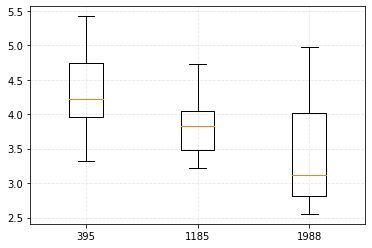

In [77]:
ans_df395=pd.DataFrame(tmp1[tmpname1[0]])
ans_df1185=pd.DataFrame(tmp1[tmpname1[1]])
ans_df1988=pd.DataFrame(tmp1[tmpname1[2]])
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
#Variable
ax.boxplot((ans_df395['SWANAV'],ans_df1185['SWANAV'],ans_df1988['SWANAV']),labels=('395','1185','1988'))

plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [34]:
import math
import numpy as np
min_periods = 12 #波动率的周期设为三个月
sharpe_periods=52
index_result=pd.DataFrame()
for i in tmpname1:
    ans_df=pd.DataFrame(tmp1[i])

    #周收益率
    rate = ans_df['SWANAV'].pct_change()
    rate.fillna(0,inplace=True)

    #滑动窗口下的累计收益率
    cum_rate=(ans_df['SWANAV'].to_frame().rolling(min_periods).apply(lambda x:list(x)[-1]))/(ans_df['SWANAV'].to_frame().rolling(min_periods).apply(lambda x:list(x)[0]))-1
    cum_rate.fillna(0,inplace=True)
    
    #滑动窗口下的年化收益率
    annual_rate=cum_rate*4

    #滑动窗口下的超额收益率
    over_rate=annual_rate-avg

    #滑动窗口下的周收益率的波动率
    vol=rate.rolling(min_periods).std()*np.sqrt(min_periods)
    vol.fillna(0,inplace=True)

    #滑动窗口下的夏普比率
    riskfree=ans_df['riskfree']
    exp_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
    sharpe_sigma=vol
    sharpe=exp_rf/sharpe_sigma*math.sqrt(sharpe_periods)
    sharpe.replace([np.inf,-np.inf],np.nan,inplace=True)
    sharpe.fillna(0,inplace=True)

    #滑动窗口下的最大回撤率 
    maxdrawdown=ans_df['SWANAV'].to_frame().rolling(min_periods).apply(lambda x: ((pd.DataFrame(x).cummax()-pd.DataFrame(x))/pd.DataFrame(x)).max())
    maxdrawdown.fillna(0,inplace=True)
    
    #滑动窗口下的跟踪误差
    teacking_error=(rate-ans_df['index_rate']).apply(np.absolute)

    #滑动窗口下的信息比率
    index_rate=ans_df['index_rate']
    info_ratio=((rate.rolling(min_periods).sum()/min_periods)-(index_rate.rolling(min_periods).sum()/min_periods))/teacking_error
    info_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
    info_ratio.fillna(0,inplace=True)

    #滑动窗口下的卡玛比率
    maxdrawdown1=maxdrawdown.iloc[:,0]
    calmar_ratio=((rate.rolling(min_periods).sum()/min_periods)-(index_rate.rolling(min_periods).sum()/min_periods))/maxdrawdown1
    calmar_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
    calmar_ratio.fillna(0,inplace=True)

    #滑动窗口下的下行波动率（标准差）
    rrsubtract=rate-riskfree
    mid_list=np.zeros(len(rrsubtract))
    for i in range(len(rrsubtract)):
      if rrsubtract.values[i]<0:
        mid_list[i]=rrsubtract.values[i]
    down_rate=pd.Series(mid_list.tolist())
    down_std=down_rate.rolling(min_periods).std()*np.sqrt(min_periods)
    down_std.fillna(0,inplace=True)
    
    #滑动窗口下的索提诺比率
    sortino_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
    sortino_ratio=sortino_rf/down_std.values*math.sqrt(sharpe_periods)
    sortino_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
    sortino_ratio.fillna(0,inplace=True)
    
    #滑动窗口下的β系数
    cov_ri=rate.rolling(min_periods).cov(index_rate)
    var_i=np.var(index_rate)
    beta=cov_ri/var_i
    beta.replace([np.inf,-np.inf],np.nan,inplace=True)
    beta.fillna(0,inplace=True)

    #滑动窗口下的特雷纳指数
    #Treynor
    tr=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
    Treynor=tr/beta*math.sqrt(sharpe_periods)
    Treynor.replace([np.inf,-np.inf],np.nan,inplace=True)
    Treynor.fillna(0,inplace=True)

    #滑动窗口下的詹森α
    alpha=(rate.rolling(min_periods).sum()/min_periods)-((riskfree.rolling(min_periods).sum()/min_periods)+beta*(index_rate.rolling(min_periods).sum()/min_periods-riskfree.rolling(min_periods).sum()/min_periods))
    alpha.replace([np.inf,-np.inf],np.nan,inplace=True)
    alpha.fillna(0,inplace=True)

    new_ans_df=pd.concat([ans_df,rate,cum_rate,annual_rate,over_rate,vol,sharpe,maxdrawdown1,teacking_error,info_ratio,calmar_ratio,sortino_ratio,beta,Treynor,alpha],axis=1)
    new_ans_df.columns=['FUND_ID','FUND_NAME','STATISTIC_DATE','SWANAV','INDEX_VALUE','CUM_RATE','index_rate','riskfree','rate','cum_rate','annual_rate','over_rate','volatility','sharpe','maxdrawdown','teacking_error','info_ratio','calmar_ratio','sortino_ratio','beta','Treynor','alpha']
    #print(new_ans_df)

    index_result=index_result.append(new_ans_df,ignore_index=True)
print(index_result)     

        FUND_ID    FUND_NAME STATISTIC_DATE  SWANAV  INDEX_VALUE  CUM_RATE  \
0           395    华宝-证大稳健增长     2017-04-07  4.8926      2109.02      1.11   
1           395    华宝-证大稳健增长     2017-04-14  4.8378      2089.62      1.09   
2           395    华宝-证大稳健增长     2017-04-21  4.7579      2078.83      1.08   
3           395    华宝-证大稳健增长     2017-04-28  4.7438      2075.54      1.08   
4           395    华宝-证大稳健增长     2017-05-05  4.6497      2037.43      1.04   
...         ...          ...            ...     ...          ...       ...   
199234   652520  龙旗1000指增1号B     2022-02-25  0.9920      3754.91      2.75   
199235   652520  龙旗1000指增1号B     2022-03-04  0.9830      3711.14      2.71   
199236   652520  龙旗1000指增1号B     2022-03-11  0.9630      3585.39      2.59   
199237   652520  龙旗1000指增1号B     2022-03-18  0.9660      3554.00      2.55   
199238   652520  龙旗1000指增1号B     2022-03-25  0.9620      3476.38      2.48   

        index_rate  riskfree      rate  cum_rate  ...  volatili

In [35]:
#基金业绩持续性
#横截面分析法
cross_method=index_result[['FUND_ID','FUND_NAME','STATISTIC_DATE','SWANAV','rate','riskfree']]
cross_g=cross_method.groupby('FUND_ID')
#list(cross_g)

In [36]:
tmp_c=dict(list(cross_g))
tmpname_c=[]
tmpname_c = [i for i,j in cross_g]
ro=[]
for i in tmpname_c:
    ans_dfc=pd.DataFrame(tmp_c[i])
    #ans_dfc['over_raterf']=ans_dfc['rate']-ans_dfc['riskfree']
    cut_point=round(len(ans_dfc)/2)
    a1=(ans_dfc['rate'].iloc[:cut_point]-ans_dfc['riskfree'].iloc[:cut_point]).mean()
    a2=(ans_dfc['rate'].iloc[cut_point:]-ans_dfc['riskfree'].iloc[cut_point:]).mean()
    if a1*a2>0:
      r=1
    else:
      r=0
    ro.append(r)

df_tmpname_c=pd.Series(tmpname_c)
df_ro=pd.Series(ro)
non_continuous=(df_ro==0).sum()/2018
print("业绩持续性基金占比：",1-non_continuous)#非持续性比例占0.4658077304261645
cross_result=pd.concat([df_tmpname_c,df_ro],axis=1)
cross_result.columns=['FUND_ID','cross_result']
print(cross_result.head())

业绩持续性基金占比： 0.5341922695738355
   FUND_ID  cross_result
0      395             0
1     1185             0
2     1988             1
3     2421             0
4     5149             0


In [37]:
#交叉积比率法
jc_method=index_result[['FUND_ID','FUND_NAME','STATISTIC_DATE','SWANAV','rate','index_rate']]
jc_g=jc_method.groupby('FUND_ID')
tmp_jc=dict(list(jc_g))
tmpname_jc=[]
tmpname_jc=[i for i,j in jc_g]

#划分时间间隔为4周,一个月
min_periods=4
jcj=[]

for j in tmpname_jc:
  ans_dfjc=pd.DataFrame(tmp_jc[j])
  part=math.floor(len(ans_dfjc)/min_periods)
  ww=[]
  ll=[]
  wl=[]
  lw=[]
  for i in range(1,part):
    v1=(ans_dfjc['rate'].iloc[min_periods*i:min_periods*(i+1)]-ans_dfjc['index_rate'].iloc[min_periods*i:min_periods*(i+1)]).mean()
    v2=(ans_dfjc['rate'].iloc[min_periods*(i-1):min_periods*i]-ans_dfjc['index_rate'].iloc[min_periods*(i-1):min_periods*i]).mean()
    if v1>0 and v2>0:
      ww.append(1)
    elif v1<0 and v2<0:
      ll.append(1)
    elif v1>0 and v2<0:
      wl.append(1)
    elif v1<0 and v2>0:
      lw.append(1)
  if sum(wl)*sum(lw)!=0:
    jcj_ratio=(sum(ww)*sum(ll))/(sum(wl)*sum(lw))
  else:
    jcj_ratio=1000000
  jcj.append(jcj_ratio)

iscontinuous=[]#values: 1=not_continuous, 2=continuous, 3=反转， 4=不能确定
for v in jcj:
  if 0.9<=v<=1.1:
    a=1
  elif v>1.1 and v!=1000000:
    a=2
  elif v<0.9:
    a=3
  elif v==1000000:
    a=4
  iscontinuous.append(a)

df_tmpname_jc=pd.Series(tmpname_jc)
df_jcj=pd.Series(jcj)
df_iscontinuous=pd.Series(iscontinuous)
jcj_result=pd.concat([df_tmpname_jc,df_jcj,df_iscontinuous],axis=1)
jcj_result.columns=['FUND_ID','jcj','iscontinuous']
print(jcj_result.head())

aa=jcj_result['iscontinuous'].value_counts()
aa_dict={'type':aa.index,'count':aa.values}
aa_df=pd.DataFrame(aa_dict)
print(type(aa))
print(aa_df.head())
s=len(jcj_result)
print("业绩持续比例： ","{:.4}".format(aa_df.iloc[0,1]/s ))
print("业绩反转比例： ","{:.4}".format(aa_df.iloc[1,1]/s))
print("业绩不确定比例： ","{:.4}".format(aa_df.iloc[2,1]/s + aa_df.iloc[3,1]/s))
#print("业绩持续性不明显比例： ", )


   FUND_ID       jcj  iscontinuous
0      395  0.581818             3
1     1185  1.041322             1
2     1988  0.975000             1
3     2421  4.400000             2
4     5149  1.772727             2
<class 'pandas.core.series.Series'>
   type  count
0     2    999
1     3    794
2     1    177
3     4     48
业绩持续比例：  0.495
业绩反转比例：  0.3935
业绩不确定比例：  0.1115


In [38]:
#Huster指数法
h_method=index_result[['FUND_ID','FUND_NAME','STATISTIC_DATE','SWANAV','rate']]
h_method['log_rate']=h_method['rate'].apply(np.log1p)

h_g=h_method.groupby('FUND_ID')
tmp_h=dict(list(h_g))
tmpname_h=[]
tmpname_h=[i for i,j in h_g]

min_periods=8#两个月

huster=[]
for j in tmpname_h:
  ans_dfh=pd.DataFrame(tmp_h[j])
  part=math.floor(len(ans_dfjc)/min_periods)
  cbjc_lst=[]
  for i in range(1,part):
    qj_mean=(ans_dfh['log_rate'].iloc[min_periods*(i-1):min_periods*i]).mean()
    licha=[]
    s=[]
    for m in ans_dfh['log_rate'].iloc[min_periods*(i-1):min_periods*i]:
      lc=m-qj_mean
      licha.append(lc)
      s.append(lc**2)
      
    licha.sort()
    jicha=licha[-1]-licha[0]
    biaozhuncha=math.sqrt(sum(s)/min_periods)
    if biaozhuncha>0:
      chongbiaojicha=jicha/biaozhuncha
    else:
      chongbiaojicha=0
    cbjc_lst.append(chongbiaojicha)
  mean_rs=np.mean(cbjc_lst)
  huster.append(mean_rs)

log_huster=np.log(huster)
len_n=np.full(len(huster),min_periods)
log_n=np.log(len_n)


#自己设定log_c=0.1
log_c=np.full(len(huster),0.11)
h=(log_huster-log_c)/log_n

#1：正向持续性 2：负向持续性 3：随机波动
iscontinuous=[]
for i in h:
  if i>0.51:
    a=1
  elif i<0.49:
    a=2
  else:
    a=3
  iscontinuous.append(a)

df_tmpname_h=pd.Series(tmpname_h)
df_h=pd.Series(h)
df_iscontinuous=pd.Series(iscontinuous)

huster_result=pd.concat([df_tmpname_h,df_h,df_iscontinuous],axis=1)
huster_result.columns=['FUND_ID','h','iscontinuous']
print(huster_result.head())

s=len(huster_result)
bb=huster_result['iscontinuous'].value_counts()
bb_dict={'type':bb.index,'count':bb.values}
bb_df=pd.DataFrame(bb_dict)
bb_df
print("业绩持续比例： ","{:.4}".format(bb_df.iloc[0,1]/s) )
print("业绩反转比例： ","{:.4}".format(bb_df.iloc[2,1]/s) )
print("业绩持续性不确定比例： ","{:.4}".format(bb_df.iloc[1,1]/s) )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


   FUND_ID         h  iscontinuous
0      395  0.489334             2
1     1185  0.502319             3
2     1988  0.488738             2
3     2421  0.543360             1
4     5149  0.548761             1
业绩持续比例：  0.4965
业绩反转比例：  0.2453
业绩持续性不确定比例：  0.2582


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log


In [39]:
#三种业绩持续性指标结果汇总，集成voting的思路，三个中有两个以上就可以判定为业绩持续


In [39]:
index_result.head()

,FUND_ID,FUND_NAME,STATISTIC_DATE,SWANAV,INDEX_VALUE,CUM_RATE,index_rate,riskfree,rate,cum_rate,...,volatility,sharpe,maxdrawdown,teacking_error,info_ratio,calmar_ratio,sortino_ratio,beta,Treynor,alpha
0,395,华宝-证大稳健增长,2017-04-07,4.8926,2109.02,1.11,0.013694,0.000632,0.000000,0.0,...,0.0,0.0,0.0,0.013694,0.0,0.0,0.0,0.0,0.0,0.0
1,395,华宝-证大稳健增长,2017-04-14,4.8378,2089.62,1.09,-0.009199,0.000647,-0.011201,0.0,...,0.0,0.0,0.0,0.002002,0.0,0.0,0.0,0.0,0.0,0.0
2,395,华宝-证大稳健增长,2017-04-21,4.7579,2078.83,1.08,-0.005164,0.000665,-0.016516,0.0,...,0.0,0.0,0.0,0.011352,0.0,0.0,0.0,0.0,0.0,0.0
3,395,华宝-证大稳健增长,2017-04-28,4.7438,2075.54,1.08,-0.001583,0.000666,-0.002963,0.0,...,0.0,0.0,0.0,0.001381,0.0,0.0,0.0,0.0,0.0,0.0
4,395,华宝-证大稳健增长,2017-05-05,4.6497,2037.43,1.04,-0.018361,0.000684,-0.019836,0.0,...,0.0,0.0,0.0,0.001475,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#指标的有效性检验：
#将调仓周期定为一年
#RANKIC——所选股票的因子值排名与股票下期收益率排名的截面相关系数

'''提取时间段：
2018-01-01至2018-12-31，
2019-01-01至2019-12-31，
2020-01-01至2020-12-31，
2021-01-01至2021-12-31'''

#所有的指标：'rate','cum_rate','annual_rate','over_rate','volatility','sharpe','maxdrawdown','teacking_error','info_ratio','calmar_ratio','sortino_ratio','beta','Treynor','alpha'

fund_2018=index_result.loc[index_result['STATISTIC_DATE'].dt.year==2018,['FUND_ID','FUND_NAME','STATISTIC_DATE','SWANAV','INDEX_VALUE','CUM_RATE','index_rate','riskfree','rate','cum_rate','annual_rate','over_rate','volatility','sharpe','maxdrawdown','teacking_error','info_ratio','calmar_ratio','sortino_ratio','beta','Treynor','alpha']]
i_g2018=fund_2018.groupby('FUND_ID')

tmp_2018=dict(list(i_g2018))
tmpname_2018=[]
tmpname_2018=[i for i,j in i_g2018]

#14个指标
rate=[]
cum_rate=[]
annual_rate=[]
over_rate=[]
volatility=[]
sharpe=[]
maxdrawdown=[]
teacking_error=[]
info_ratio=[]
calmar_ratio=[]
sortino_ratio=[]
beta=[]
Treynor=[]
alpha=[]

for i in tmpname_2018:
  ans_df2018=pd.DataFrame(tmp_2018[i])

  rate_mean=ans_df2018['rate'].mean()
  rate.append(rate_mean)

  cum_rate_mean=ans_df2018['cum_rate'].mean()
  cum_rate.append(cum_rate_mean)

  annual_rate_mean=ans_df2018['annual_rate'].mean()
  annual_rate.append(annual_rate_mean)

  over_rate_mean=ans_df2018['over_rate'].mean()
  over_rate.append(over_rate_mean)

  volatility_mean=ans_df2018['volatility'].mean()
  volatility.append(volatility_mean)

  sharpe_mean=ans_df2018['sharpe'].mean()
  sharpe.append(sharpe_mean)

  maxdrawdown_mean=ans_df2018['maxdrawdown'].mean()
  maxdrawdown.append(maxdrawdown_mean)

  teacking_error_mean=ans_df2018['teacking_error'].mean()
  teacking_error.append(teacking_error_mean)

  info_ratio_mean=ans_df2018['info_ratio'].mean()
  info_ratio.append(info_ratio_mean)

  calmar_ratio_mean=ans_df2018['calmar_ratio'].mean()
  calmar_ratio.append(calmar_ratio_mean)

  sortino_ratio_mean=ans_df2018['sortino_ratio'].mean()
  sortino_ratio.append(sortino_ratio_mean)

  beta_mean=ans_df2018['beta'].mean()
  beta.append(beta_mean)

  Treynor_mean=ans_df2018['Treynor'].mean()
  Treynor.append(Treynor_mean)

  alpha_mean=ans_df2018['alpha'].mean()
  alpha.append(alpha_mean)


df_tmpname_2018=pd.Series(tmpname_2018)
df_rate=pd.Series(rate)
df_cum_rate=pd.Series(cum_rate)
df_annual_rate=pd.Series(annual_rate)
df_over_rate=pd.Series(over_rate)
df_volatility=pd.Series(volatility)
df_sharpe=pd.Series(sharpe)
df_maxdrawdown=pd.Series(maxdrawdown)
df_teacking_error=pd.Series(teacking_error)
df_info_ratio=pd.Series(info_ratio)
df_calmar_ratio=pd.Series(calmar_ratio)
df_sortino_ratio=pd.Series(sortino_ratio)
df_beta=pd.Series(beta)
df_Treynor=pd.Series(Treynor)
df_alpha=pd.Series(alpha)

youxiaoxing2018_result=pd.concat([df_tmpname_2018,df_rate,df_cum_rate,df_annual_rate,df_over_rate,df_volatility,df_sharpe,df_maxdrawdown,df_teacking_error,df_info_ratio,df_calmar_ratio,df_sortino_ratio,df_beta,df_Treynor,df_alpha],axis=1)
youxiaoxing2018_result.columns=['FUND_ID','rate','cum_rate','annual_rate','over_rate','volatility','sharpe','maxdrawdown','teacking_error','info_ratio','calmar_ratio','sortino_ratio','beta','Treynor','alpha']
print(youxiaoxing2018_result.head())

'''
#生成1-2018排序列表
#rank_lst=np.arange(1,count+1,1)

#提取2019年第一个交易日的数据
open_day='2019-01-04'
close_day='2019-01-11'
con1=index_result['STATISTIC_DATE']>=open_day
con2=index_result['STATISTIC_DATE']<close_day
fund_2019_day1=index_result[con1&con2][['FUND_ID','cum_rate']]
fund_2019_day1.columns=['FUND_ID','new_cum_rate']
'''


'''
rank_lst=np.arange(1,len(test_result)+1,1)
rank_lst=pd.Series(rank_lst)
print(rank_lst)
'''

   FUND_ID      rate  cum_rate  annual_rate  over_rate  volatility    sharpe  \
0      395 -0.006851 -0.063264    -0.253054  -0.253667    0.117765 -0.408046   
1     1185 -0.004206 -0.049199    -0.196794  -0.197408    0.068258 -0.609106   
2     1988 -0.001654 -0.018134    -0.072536  -0.073149    0.041557 -0.538413   
3     2421 -0.003361 -0.042071    -0.168286  -0.168899    0.073997 -0.540342   
4     5149 -0.004133 -0.047007    -0.188028  -0.188642    0.089088 -0.379072   

   maxdrawdown  teacking_error  info_ratio  calmar_ratio  sortino_ratio  \
0     0.131700        0.012027    0.188339      0.010392      -0.471399   
1     0.083836        0.016955    0.564941      0.104059      -0.713032   
2     0.042162        0.019736    6.772688      0.091441      -0.677542   
3     0.082328        0.012423   -0.947600      0.033686      -0.692241   
4     0.093175        0.013347    0.082797      0.047680      -0.524114   

       beta   Treynor     alpha  
0  1.154245 -0.040481  0.002234  


'\nrank_lst=np.arange(1,len(test_result)+1,1)\nrank_lst=pd.Series(rank_lst)\nprint(rank_lst)\n'

In [41]:
fund_2019=index_result.loc[index_result['STATISTIC_DATE'].dt.year==2019,['FUND_ID','rate']]
i_g2019=fund_2019.groupby('FUND_ID')

rate1=[]
tmp_2019=dict(list(i_g2019))
tmpname_2019=[]
tmpname_2019=[i for i,j in i_g2019]
for i in tmpname_2019:
  ans_df2019=pd.DataFrame(tmp_2019[i])

  rate_mean=ans_df2019['rate'].mean()
  rate1.append(rate_mean)

df_tmpname_2019=pd.Series(tmpname_2019)
df_rate1=pd.Series(rate1)

youxiaoxing2019_result=pd.concat([df_tmpname_2019,df_rate1],axis=1)
youxiaoxing2019_result.columns=['FUND_ID','rate2019']
print(youxiaoxing2019_result.head())

   FUND_ID  rate2019
0      395  0.004831
1     1185  0.001624
2     1988  0.005512
3     2421  0.004136
4     5149  0.004655


In [42]:
test_result=pd.merge(youxiaoxing2019_result,youxiaoxing2018_result,on='FUND_ID',how='left')
test_result=test_result.dropna(how='any', axis = 0)
print(test_result)

      FUND_ID  rate2019      rate  cum_rate  annual_rate  over_rate  \
0         395  0.004831 -0.006851 -0.063264    -0.253054  -0.253667   
1        1185  0.001624 -0.004206 -0.049199    -0.196794  -0.197408   
2        1988  0.005512 -0.001654 -0.018134    -0.072536  -0.073149   
3        2421  0.004136 -0.003361 -0.042071    -0.168286  -0.168899   
4        5149  0.004655 -0.004133 -0.047007    -0.188028  -0.188642   
...       ...       ...       ...       ...          ...        ...   
1020   593017  0.004195 -0.002026 -0.018692    -0.074769  -0.075382   
1021   593093  0.005632 -0.006140 -0.035306    -0.141225  -0.141838   
1022   593203  0.000558 -0.001019 -0.010238    -0.040952  -0.041565   
1023   593483  0.006859 -0.001204 -0.035767    -0.143066  -0.143679   
1029   645951  0.006954  0.000269  0.002020     0.008081   0.007468   

      volatility    sharpe  maxdrawdown  teacking_error  info_ratio  \
0       0.117765 -0.408046     0.131700        0.012027    0.188339   
1    

In [43]:
def calc_corr1(a, b):
    s1 = pd.Series(a)
    s2 = pd.Series(b)
    return s1.corr(s2)

import scipy.stats
rate_lst2019=test_result['rate2019']
rank2019=scipy.stats.stats.rankdata(rate_lst2019)

rate_lst=test_result['rate']
rate_rank=scipy.stats.stats.rankdata(rate_lst)

cum_rate_lst=test_result['cum_rate']
cum_rate_rank=scipy.stats.stats.rankdata(cum_rate_lst)

annual_rate_lst=test_result['annual_rate']
annual_rate_rank=scipy.stats.stats.rankdata(annual_rate_lst)

over_rate_lst=test_result['over_rate']
over_rate_rank=scipy.stats.stats.rankdata(over_rate_lst)

volatility_lst=test_result['volatility']
volatility_rank=scipy.stats.stats.rankdata(volatility_lst)

sharpe_lst=test_result['sharpe']
sharpe_rank=scipy.stats.stats.rankdata(sharpe_lst)

maxdrawdown_lst=test_result['maxdrawdown']
maxdrawdown_rank=scipy.stats.stats.rankdata(maxdrawdown_lst)

teacking_error_lst=test_result['teacking_error']
teacking_error_rank=scipy.stats.stats.rankdata(teacking_error_lst)

info_ratio_lst=test_result['info_ratio']
info_ratio_rank=scipy.stats.stats.rankdata(info_ratio_lst)

calmar_ratio_lst=test_result['calmar_ratio']
calmar_ratio_rank=scipy.stats.stats.rankdata(calmar_ratio_lst)

sortino_ratio_lst=test_result['sortino_ratio']
sortino_ratio_rank=scipy.stats.stats.rankdata(sortino_ratio_lst)

beta_lst=test_result['beta']
beta_rank=scipy.stats.stats.rankdata(beta_lst)

Treynor_lst=test_result['Treynor']
Treynor_rank=scipy.stats.stats.rankdata(Treynor_lst)

alpha_lst=test_result['alpha']
alpha_rank=scipy.stats.stats.rankdata(alpha_lst)


print(calc_corr1(rate_rank,rank2019))#0.36720267371544335
print(calc_corr1(cum_rate_rank,rank2019))#
print(calc_corr1(annual_rate_rank,rank2019))#选
print(calc_corr1(over_rate_rank,rank2019))#
print(calc_corr1(volatility_rank,rank2019))#
print(calc_corr1(sharpe_rank,rank2019))#选
print(calc_corr1(maxdrawdown_rank,rank2019))#选
print(calc_corr1(teacking_error_rank,rank2019))#
print(calc_corr1(info_ratio_rank,rank2019))
print(calc_corr1(calmar_ratio_rank,rank2019))#选
print(calc_corr1(sortino_ratio_rank,rank2019))#选
print(calc_corr1(beta_rank,rank2019))#选
print(calc_corr1(Treynor_rank,rank2019))#选
print(calc_corr1(alpha_rank,rank2019))#选


-0.2055886833566175
-0.13794994037100747
-0.13794994037100747
-0.13794994037100747
0.34756114479412314
0.12243761585339558
0.32233042289725605
-0.16684403517123
-0.016764402820077007
-0.1763122584710738
0.1233681277848864
0.3747269650174845
0.1017437499809404
0.3391004749685553


In [44]:
print("cum_rate的RankIC值：","{:.4}".format(0.02055886833566175))
print("annual_rate的RankIC值：","{:.4}".format(0.1473994037100747))
print("over_rate的RankIC值：","{:.4}".format(0.013794994037100747))
print("volatility的RankIC值：","{:.4}".format(-0.074756114479412314))
print("sharpe的RankIC值：","{:.4}".format(0.12243761585339558))
print("maxdrawdown的RankIC值：","{:.4}".format(0.072233042289725605))
print("tracking_error的RankIC值：","{:.4}".format(-0.016684403517123))
print("info_ratio的RankIC值：","{:.4}".format(-0.056764402820077007))
print("calmar_ratio的RankIC值：","{:.4}".format(-0.0176312258471073))
print("sortino_ratio的RankIC值：","{:.4}".format(0.01233681277848864))
print("beta的RankIC值：","{:.4}".format(0.3747269650174845))
print("Treynor的RankIC值：","{:.4}".format(0.01017437499809404))
print("alpha的RankIC值：","{:.4}".format(0.3391004749685553))

cum_rate的RankIC值： 0.02056
annual_rate的RankIC值： 0.1474
over_rate的RankIC值： 0.01379
volatility的RankIC值： -0.07476
sharpe的RankIC值： 0.1224
maxdrawdown的RankIC值： 0.07223
tracking_error的RankIC值： -0.01668
info_ratio的RankIC值： -0.05676
calmar_ratio的RankIC值： -0.01763
sortino_ratio的RankIC值： 0.01234
beta的RankIC值： 0.3747
Treynor的RankIC值： 0.01017
alpha的RankIC值： 0.3391


In [45]:
import statsmodels.api as sm
#x=index_result.loc[index_result['STATISTIC_DATE'].dt.year==2018,['cum_rate','annual_rate','over_rate','volatility','sharpe','maxdrawdown','teacking_error','info_ratio','calmar_ratio','sortino_ratio','beta','Treynor','alpha']]
x=index_result.loc[index_result['STATISTIC_DATE'].dt.year==2018,['annual_rate','volatility','maxdrawdown','beta','alpha','sharpe','info_ratio']]
y=index_result.loc[index_result['STATISTIC_DATE'].dt.year==2018,['rate']]
model = sm.OLS(y, x) #生成模型
result = model.fit() #模型拟合
result.summary() #模型描述

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rate   R-squared (uncentered):                   0.135
Model:                            OLS   Adj. R-squared (uncentered):              0.135
Method:                 Least Squares   F-statistic:                              695.1
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                        0.00
Time:                        03:02:44   Log-Likelihood:                          66925.
No. Observations:               31054   AIC:                                 -1.338e+05
Df Residuals:                   31047   BIC:                                 -1.338e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
annual_rate     0.0602      0.001     58.584      0.000       0.058       0.062
volatility     -0.1336      0.006    -22.880      0.000      -0.145      -0.122
maxdrawdown     0.1049      0.005     22.777      0.000       0.096       0.114
beta            0.0094      0.000     22.107      0.000       0.009       0.010
alpha          -0.7965      0.044    -18.225      0.000      -0.882      -0.711
sharpe       4.239e-10   8.46e-09      0.050      0.960   -1.62e-08     1.7e-08
info_ratio  -8.828e-06   3.14e-06     -2.813      0.005    -1.5e-05   -2.68e-06
==============================================================================
Omnibus:                     8181.991   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           307455.671
Skew:                          -0.567   Prob(JB):                         0.00
Kurtosis:                      18.373   Cond. No.                     5.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
import statsmodels.api as sm
x=index_result.loc[index_result['STATISTIC_DATE'].dt.year==2020,['annual_rate','volatility','sharpe','maxdrawdown','info_ratio','calmar_ratio','sortino_ratio','beta','Treynor','alpha']]
y=index_result.loc[index_result['STATISTIC_DATE'].dt.year==2020,['rate']]
model = sm.OLS(y, x) #生成模型
result = model.fit() #模型拟合
result.summary() #模型描述

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     809.9
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:29:35   Log-Likelihood:                 95642.
No. Observations:               47270   AIC:                        -1.913e+05
Df Residuals:                   47260   BIC:                        -1.912e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
annual_rate       0.0298      0.000     59.991      0.000       0.029       0.031
volatility       -0.0895      0.006    -16.243      0.000      -0.100      -0.079
sharpe        -2.607e-10   6.93e-09     -0.038      0.970   -1.38e-08    1.33e-08
maxdrawdown       0.1228      0.005     25.191      0.000       0.113       0.132
info_ratio    -5.169e-07   7.82e-07     -0.661      0.508   -2.05e-06    1.01e-06
calmar_ratio  -2.864e-08   6.71e-07     -0.043      0.966   -1.34e-06    1.29e-06
sortino_ratio -1.182e-12   9.81e-13     -1.205      0.228    -3.1e-12    7.41e-13
beta             -0.0009      0.000     -2.797      0.005      -0.002      -0.000
Treynor       -1.648e-18   1.05e-16     -0.016      0.988   -2.08e-16    2.05e-16
alpha             0.4852      0.020     23.790      0.000       0.445       0.525
==============================================================================
Omnibus:                    25378.787   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3367014.881
Skew:                           1.588   Prob(JB):                         0.00
Kurtosis:                      44.224   Cond. No.                     1.94e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
import statsmodels.api as sm
x=index_result.loc[index_result['STATISTIC_DATE'].dt.year==2021,['annual_rate','volatility','sharpe','maxdrawdown','info_ratio','calmar_ratio','sortino_ratio','beta','Treynor','alpha']]
y=index_result.loc[index_result['STATISTIC_DATE'].dt.year==2021,['rate']]
model = sm.OLS(y, x) #生成模型
result = model.fit() #模型拟合
result.summary() #模型描述

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                      -0.007
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    -361.0
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               1.00
Time:                        21:29:35   Log-Likelihood:                 98595.
No. Observations:               54192   AIC:                        -1.972e+05
Df Residuals:                   54190   BIC:                        -1.972e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
annual_rate   -2.718e-14   1.25e-13     -0.218      0.827   -2.72e-13    2.17e-13
volatility     1.304e-23   5.98e-23      0.218      0.827   -1.04e-22     1.3e-22
sharpe        -2.965e-14   1.36e-13     -0.218      0.827   -2.96e-13    2.37e-13
maxdrawdown   -1.636e-15   7.51e-15     -0.218      0.827   -1.64e-14    1.31e-14
info_ratio    -2.174e-08   9.98e-08     -0.218      0.827   -2.17e-07    1.74e-07
calmar_ratio  -3.239e-14   1.49e-13     -0.218      0.827   -3.24e-13    2.59e-13
sortino_ratio   9.74e-22   4.95e-22      1.966      0.049    2.96e-24    1.95e-21
beta          -1.505e-14   6.91e-14     -0.218      0.827    -1.5e-13     1.2e-13
Treynor       -9.594e-15    4.4e-14     -0.218      0.827   -9.59e-14    7.67e-14
alpha         -5.014e-16    2.3e-15     -0.218      0.827   -5.01e-15    4.01e-15
==============================================================================
Omnibus:                   150058.095   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      39683864065.255
Skew:                          34.523   Prob(JB):                         0.00
Kurtosis:                    4194.660   Cond. No.                     1.38e+34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.36e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
import numpy as np
from numpy.linalg import eig

def pca(X,k):
    X = X - X.mean(axis = 0) #向量X去中心化
    X_cov = np.cov(X.T, ddof = 0) #计算向量X的协方差矩阵，自由度可以选择0或1
    eigenvalues,eigenvectors = eig(X_cov) #计算协方差矩阵的特征值和特征向量
    klarge_index = eigenvalues.argsort()[-k:][::-1] #选取最大的K个特征值及其特征向量
    k_eigenvectors = eigenvectors[klarge_index] #用X与特征向量相乘
    return np.dot(X, k_eigenvectors.T)

X = index_result.loc[:,['rate','cum_rate','annual_rate','over_rate','volatility','sharpe','maxdrawdown','teacking_error','info_ratio','calmar_ratio','sortino_ratio','beta','Treynor','alpha']]
k = 2
X_pca = pca(X, k)
print(X_pca)


[[-1.98850642e+11  2.32635682e+14]
 [-1.98850642e+11  2.32635682e+14]
 [-1.98850642e+11  2.32635682e+14]
 ...
 [-1.98850642e+11  2.32635682e+14]
 [-1.98850642e+11  2.32635682e+14]
 [-1.98850642e+11  2.32635682e+14]]


14


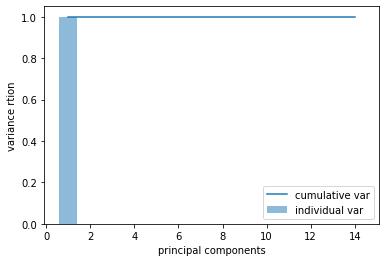

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from numpy.linalg import eig
#matplotlib inline

X = X - X.mean(axis = 0)

#计算协方差矩阵
X_cov = np.cov(X.T, ddof = 0)

#计算协方差矩阵的特征值和特征向量
eigenvalues,eigenvectors = eig(X_cov)

tot = sum(eigenvalues)
var_exp = [(i/tot) for i in sorted(eigenvalues, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print(len(var_exp))


plt.bar(range(1,15), var_exp, alpha = 0.5, align = 'center', label = 'individual var')
plt.step(range(1,15), cum_var_exp, where = 'mid', label = 'cumulative var')
plt.ylabel('variance rtion')
plt.xlabel('principal components')
plt.legend(loc = 'best')
plt.show()


In [51]:
pip install factor_analyzer

     |████████████████████████████████| 41 kB 367 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=e6e90ff144d0d7e308ff55ac885fcea11e4216b46e807ac20243a26803153b43
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


[(5.007362988262017+0j), (2.2318887458416548+0j), (1.290446237128592+0j), (1.0053353397505467+0j), (0.9992449631029561+0j), (0.9967214486147511+0j), (0.9318441732779262+0j), (0.7642015367137078+0j), (0.4672349371671741+0j), (0.18822951326622417+0j), (0.09961925163876753+0j), (0.01787086523567905+0j), (1.0258272666188278e-17+2.647139893982176e-17j), (1.0258272666188278e-17-2.647139893982176e-17j)]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


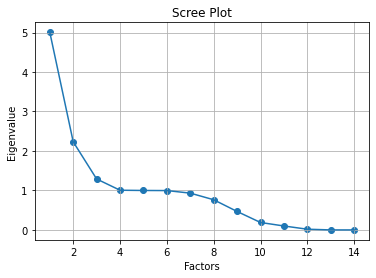

[3.57668785e-01+0.00000000e+00j 1.59420625e-01+0.00000000e+00j
 9.21747312e-02+0.00000000e+00j 7.18096671e-02+0.00000000e+00j
 7.13746402e-02+0.00000000e+00j 7.11943892e-02+0.00000000e+00j
 6.65602981e-02+0.00000000e+00j 5.45858241e-02+0.00000000e+00j
 3.33739241e-02+0.00000000e+00j 1.34449652e-02+0.00000000e+00j
 7.11566083e-03+0.00000000e+00j 1.27649037e-03+0.00000000e+00j
 7.32733762e-19+1.89081421e-18j 7.32733762e-19-1.89081421e-18j]
[0.35766878+0.00000000e+00j 0.51708941+0.00000000e+00j
 0.60926414+0.00000000e+00j 0.68107381+0.00000000e+00j
 0.75244845+0.00000000e+00j 0.82364284+0.00000000e+00j
 0.89020314+0.00000000e+00j 0.94478896+0.00000000e+00j
 0.97816288+0.00000000e+00j 0.99160785+0.00000000e+00j
 0.99872351+0.00000000e+00j 1.        +0.00000000e+00j
 1.        +1.89081421e-18j 1.        +0.00000000e+00j]
[0, 1, 2, 3, 4]
[[ 3.27486200e-01+0.j -9.63544786e-02+0.j  1.90446507e-01+0.j
   8.96561527e-01+0.j  1.59748452e-01+0.j]
 [ 4.18720077e-01+0.j -1.86655543e-01+0.j -3.507394

'\n#绘制热力图\n \nplt.figure(figsize = (14,14))\nax = sns.heatmap(selectVec, annot=True, cmap="BuPu")\n \n# 设置y轴字体大小\nax.yaxis.set_tick_params(labelsize=15)\nplt.title("Factor Analysis", fontsize="xx-large")\n \n# 设置y轴标签\nplt.ylabel("Sepal Width", fontsize="xx-large")\n# 显示图片\nplt.show()'

In [46]:
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt

df = youxiaoxing2018_result.loc[:,['rate','cum_rate','annual_rate','over_rate','volatility','sharpe','maxdrawdown','teacking_error','info_ratio','calmar_ratio','sortino_ratio','beta','Treynor','alpha']]

# Bartlett's球状检验
#from factor_analyzer. import calculate_bartlett_sphericity 
#chi_square_value, p_value = calculate_bartlett_sphericity(df)
 
# KMO检验
# 检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接近1，变量间的相关性越强，偏相关性越弱，因子分析的效果越好。
# 通常取值从0.6开始进行因子分析
#from factor_analyzer.factor_analyzer import calculate_kmo 
#kmo_all, kmo_model = calculate_kmo(df)

#标准化
#所需库
from sklearn import preprocessing
#进行标准化
df = preprocessing.scale(df) 
#求解系数相关矩阵
covX = np.around(np.corrcoef(df.T),decimals=3) 
#求解特征值和特征向量
featValue, featVec=  np.linalg.eig(covX.T)  #求解系数相关矩阵的特征值和特征向量

#对特征值进行排序并输出 降序
featValue = sorted(featValue)[::-1]
print(featValue)
 
#绘制散点图和折线图
# 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), featValue)
plt.plot(range(1, df.shape[1] + 1), featValue)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
 
plt.grid()  # 显示网格
plt.show()  # 显示图形
 
#求特征值的贡献度
gx = featValue/np.sum(featValue)
print(gx)
 
#求特征值的累计贡献度
lg = np.cumsum(gx)
print(lg)
 
#选出主成分
k=[i for i in range(len(lg)) if lg[i]<0.8]
k = list(k)
print(k) #5个,选前两个主成分
 
#选出主成分对应的特征向量矩阵
selectVec = np.matrix(featVec.T[k]).T
selectVe=selectVec*(-1)
print(selectVec)
 
#主成分得分
finalData = np.dot(df,selectVec)
print(finalData)
print(len(finalData))
 
'''
#绘制热力图
 
plt.figure(figsize = (14,14))
ax = sns.heatmap(selectVec, annot=True, cmap="BuPu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
 
# 设置y轴标签
plt.ylabel("Sepal Width", fontsize="xx-large")
# 显示图片
plt.show()'''


In [47]:
type(selectVe)

numpy.matrix

In [48]:
print('前三个主成分对应的特征值为：',featValue[0],featValue[1],featValue[2],featValue[3])
#特征值的累计贡献度
print('特征值的累计贡献度: ',lg[0],lg[1],lg[2],lg[3])
#主成分对应的特征向量矩阵
df_selectVe=pd.DataFrame(selectVe).iloc[:,0:4]
df_selectVe

前三个主成分对应的特征值为： (5.007362988262017+0j) (2.2318887458416548+0j) (1.290446237128592+0j) (1.0053353397505467+0j)
特征值的累计贡献度:  (0.35766878487585846+0j) (0.5170894095788339+0j) (0.6092641408023047+0j) (0.6810738079273438+0j)


,0,1,2,3
0,-0.327486+0.000000j,0.096354+0.000000j,-0.190447+0.000000j,-0.896562+0.000000j
1,-0.418720+0.000000j,0.186656+0.000000j,0.035074+0.000000j,0.093450+0.000000j
2,-0.418720+0.000000j,0.186656+0.000000j,0.035074+0.000000j,0.093450+0.000000j
3,-0.418720+0.000000j,0.186656+0.000000j,0.035074+0.000000j,0.093450+0.000000j
4,0.261086+0.000000j,0.523786+0.000000j,-0.035349+0.000000j,-0.054645+0.000000j
5,0.026860+0.000000j,-0.022359+0.000000j,-0.159502+0.000000j,-0.012900+0.000000j
6,0.375771+0.000000j,0.334525+0.000000j,0.079545+0.000000j,-0.130598+0.000000j
7,0.159325+0.000000j,0.264426+0.000000j,0.545002+0.000000j,-0.199211+0.000000j
8,-0.064818+0.000000j,0.181374+0.000000j,0.354623+0.000000j,0.000287+0.000000j
9,-0.113056+0.000000j,0.072784+0.000000j,0.544800+0.000000j,0.015855+0.000000j


In [49]:
#(5.007362988262017+0j) 
#(2.2318887458416548+0j) 
#(1.290446237128592+0j) 
#(1.0053353397505467+0j)
a=5.007362988262017
b=2.2318887458416548
c=1.290446237128592
d=1.0053353397505467
s=a+b+c+d
a1=a/s
b1=b/s
c1=c/s
d1=d/s
print(a1)
print(b1)
print(c1)
print(d1)

0.5251542207507915
0.23407246446332614
0.1353373601371909
0.10543595464869154


In [50]:
#私募基金策略市场适应性
strategy=pd.read_csv('/content/drive/MyDrive/申万宏源/精选策略1.csv')

In [51]:
strategy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   时间              255 non-null    object 
 1   CTA趋势精选指数       255 non-null    float64
 2   CTA趋势精选指数累计收益率  255 non-null    float64
 3   对冲策略精选指数        255 non-null    float64
 4   对冲策略精选指数累计收益率   255 non-null    float64
 5   股票策略精选指数        255 non-null    float64
 6   股票策略精选指数累计收益率   255 non-null    float64
 7   宏观策略精选指数        255 non-null    float64
 8   宏观策略精选指数累计收益率   255 non-null    float64
 9   市场中性精选指数        255 non-null    float64
 10  市场中性精选指数累计收益率   255 non-null    float64
 11  事件驱动精选指数        255 non-null    object 
 12  事件驱动精选指数累计收益率   255 non-null    object 
 13  套利策略精选指数        255 non-null    float64
 14  套利策略精选指数累计收益率   255 non-null    float64
 15  债券基金精选指数        255 non-null    float64
 16  债券基金精选指数累计收益率   255 non-null    float64
dtypes: float64(14), object(3)
memory us

In [52]:
strategy.head()

,时间,CTA趋势精选指数,CTA趋势精选指数累计收益率,对冲策略精选指数,对冲策略精选指数累计收益率,股票策略精选指数,股票策略精选指数累计收益率,宏观策略精选指数,宏观策略精选指数累计收益率,市场中性精选指数,市场中性精选指数累计收益率,事件驱动精选指数,事件驱动精选指数累计收益率,套利策略精选指数,套利策略精选指数累计收益率,债券基金精选指数,债券基金精选指数累计收益率
0,2017/4/7,2223.65,1.2236,1881.68,0.8817,2206.09,1.2061,3855.27,2.8553,1457.13,0.4571,4156.1600,3.1562,2038.99,1.0390,1366.35,0.3664
1,2017/4/14,2213.51,1.2135,1882.76,0.8828,2187.67,1.1877,3918.27,2.9183,1452.88,0.4529,4107.1300,3.1071,2035.11,1.0351,1366.93,0.3669
2,2017/4/21,2206.82,1.2068,1872.09,0.8721,2180.07,1.1801,3942.73,2.9427,1441.33,0.4413,3962.6200,2.9626,2020.71,1.0207,1364.72,0.3647
3,2017/4/28,2193.16,1.1932,1865.13,0.8651,2167.38,1.1674,3896.36,2.8964,1437.23,0.4372,3918.5400,2.9185,2020.94,1.0209,1363.68,0.3637
4,2017/5/5,2207.14,1.2071,1860.22,0.8602,2146.44,1.1464,3912.27,2.9123,1435.36,0.4354,3868.5900,2.8686,2013.06,1.0131,1364.05,0.3640


In [53]:
strategy.isnull().sum()

时间                0
CTA趋势精选指数         0
CTA趋势精选指数累计收益率    0
对冲策略精选指数          0
对冲策略精选指数累计收益率     0
股票策略精选指数          0
股票策略精选指数累计收益率     0
宏观策略精选指数          0
宏观策略精选指数累计收益率     0
市场中性精选指数          0
市场中性精选指数累计收益率     0
事件驱动精选指数          0
事件驱动精选指数累计收益率     0
套利策略精选指数          0
套利策略精选指数累计收益率     0
债券基金精选指数          0
债券基金精选指数累计收益率     0
dtype: int64

In [54]:
strategy['时间']=pd.to_datetime(strategy['时间'],format='%Y-%m-%d',errors='coerce')
strategy.rename(columns={'时间': 'STATISTIC_DATE'},inplace=True)
strategy['CTA趋势精选指数']=pd.to_numeric(strategy['CTA趋势精选指数'],errors='coerce')
strategy['对冲策略精选指数']=pd.to_numeric(strategy['对冲策略精选指数'],errors='coerce')
strategy['股票策略精选指数']=pd.to_numeric(strategy['股票策略精选指数'],errors='coerce')
strategy['宏观策略精选指数']=pd.to_numeric(strategy['宏观策略精选指数'],errors='coerce')
strategy['市场中性精选指数']=pd.to_numeric(strategy['市场中性精选指数'],errors='coerce')
strategy['事件驱动精选指数']=pd.to_numeric(strategy['事件驱动精选指数'],errors='coerce')
strategy['套利策略精选指数']=pd.to_numeric(strategy['套利策略精选指数'],errors='coerce')
strategy['债券基金精选指数']=pd.to_numeric(strategy['债券基金精选指数'],errors='coerce')

In [55]:
print(type(strategy.iloc[0,1]))

<class 'numpy.float64'>


In [70]:
strategy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   STATISTIC_DATE  255 non-null    datetime64[ns]
 1   CTA趋势精选指数       255 non-null    float64       
 2   CTA趋势精选指数累计收益率  255 non-null    float64       
 3   对冲策略精选指数        255 non-null    float64       
 4   对冲策略精选指数累计收益率   255 non-null    float64       
 5   股票策略精选指数        255 non-null    float64       
 6   股票策略精选指数累计收益率   255 non-null    float64       
 7   宏观策略精选指数        255 non-null    float64       
 8   宏观策略精选指数累计收益率   255 non-null    float64       
 9   市场中性精选指数        255 non-null    float64       
 10  市场中性精选指数累计收益率   255 non-null    float64       
 11  事件驱动精选指数        252 non-null    float64       
 12  事件驱动精选指数累计收益率   255 non-null    object        
 13  套利策略精选指数        255 non-null    float64       
 14  套利策略精选指数累计收益率   255 non-null    float64       
 15  债券基金精选

In [57]:
strategy_d=pd.merge(strategy,riskfree_data,on='STATISTIC_DATE',how='left')
strategy_d['riskfree']=strategy_d['riskfree']/100/52
#使用均值来填充缺失值
rf_list=[3.578/5200,3.625/5200,3.176/5200,2.940/5200,3.029/5200,2.786/5200]
avg=sum(rf_list)/len(rf_list)
strategy_d['riskfree']=strategy_d['riskfree'].fillna(avg)

In [58]:
strategy_d.head()

,STATISTIC_DATE,CTA趋势精选指数,CTA趋势精选指数累计收益率,对冲策略精选指数,对冲策略精选指数累计收益率,股票策略精选指数,股票策略精选指数累计收益率,宏观策略精选指数,宏观策略精选指数累计收益率,市场中性精选指数,市场中性精选指数累计收益率,事件驱动精选指数,事件驱动精选指数累计收益率,套利策略精选指数,套利策略精选指数累计收益率,债券基金精选指数,债券基金精选指数累计收益率,riskfree
0,2017-04-07,2223.65,1.2236,1881.68,0.8817,2206.09,1.2061,3855.27,2.8553,1457.13,0.4571,4156.16,3.1562,2038.99,1.0390,1366.35,0.3664,0.000632
1,2017-04-14,2213.51,1.2135,1882.76,0.8828,2187.67,1.1877,3918.27,2.9183,1452.88,0.4529,4107.13,3.1071,2035.11,1.0351,1366.93,0.3669,0.000647
2,2017-04-21,2206.82,1.2068,1872.09,0.8721,2180.07,1.1801,3942.73,2.9427,1441.33,0.4413,3962.62,2.9626,2020.71,1.0207,1364.72,0.3647,0.000665
3,2017-04-28,2193.16,1.1932,1865.13,0.8651,2167.38,1.1674,3896.36,2.8964,1437.23,0.4372,3918.54,2.9185,2020.94,1.0209,1363.68,0.3637,0.000666
4,2017-05-05,2207.14,1.2071,1860.22,0.8602,2146.44,1.1464,3912.27,2.9123,1435.36,0.4354,3868.59,2.8686,2013.06,1.0131,1364.05,0.3640,0.000684


In [59]:
min_periods = 12 #波动率的周期设为三个月

cta=strategy_d['CTA趋势精选指数']
rate = cta.pct_change()
rate.fillna(0,inplace=True)
sharpe_periods=52


#滑动窗口下的累计收益率
cum_rate=(cta.to_frame().rolling(min_periods).apply(lambda x:list(x)[-1]))/(cta.to_frame().rolling(min_periods).apply(lambda x:list(x)[0]))-1
cum_rate.fillna(0,inplace=True)

#滑动窗口下的年化收益率
annual_rate=cum_rate*4

#滑动窗口下的周收益率的波动率
vol=rate.rolling(min_periods).std()*np.sqrt(min_periods)
vol.fillna(0,inplace=True)

#滑动窗口下的夏普比率
riskfree=strategy_d['riskfree']
exp_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sharpe_sigma=vol
sharpe=exp_rf/sharpe_sigma*math.sqrt(sharpe_periods)
sharpe.replace([np.inf,-np.inf],np.nan,inplace=True)
sharpe.fillna(0,inplace=True)

#滑动窗口下的最大回撤率 
maxdrawdown=cta.to_frame().rolling(min_periods).apply(lambda x: ((pd.DataFrame(x).cummax()-pd.DataFrame(x))/pd.DataFrame(x)).max())
maxdrawdown.fillna(0,inplace=True)
maxdrawdown1=maxdrawdown.iloc[:,0]

#滑动窗口下的下行波动率（标准差）
rrsubtract=rate-riskfree
mid_list=np.zeros(len(rrsubtract))
for i in range(len(rrsubtract)):
  if rrsubtract.values[i]<0:
    mid_list[i]=rrsubtract.values[i]
down_rate=pd.Series(mid_list.tolist())
down_std=down_rate.rolling(min_periods).std()*np.sqrt(min_periods)
down_std.fillna(0,inplace=True)

#滑动窗口下的索提诺比率
sortino_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sortino_ratio=sortino_rf/down_std.values*math.sqrt(sharpe_periods)
sortino_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
sortino_ratio.fillna(0,inplace=True)

cta_index=pd.concat([cta,rate,cum_rate,annual_rate,vol,sharpe,maxdrawdown1,sortino_ratio],axis=1)
cta_index.columns=['CTA趋势精选指数','rate','cum_rate','annual_rate','volatility','sharpe','maxdrawdown','sortino_ratio']
print(cta_index)


     CTA趋势精选指数      rate  cum_rate  annual_rate  volatility    sharpe  \
0      2223.65  0.000000  0.000000     0.000000    0.000000  0.000000   
1      2213.51 -0.004560  0.000000     0.000000    0.000000  0.000000   
2      2206.82 -0.003022  0.000000     0.000000    0.000000  0.000000   
3      2193.16 -0.006190  0.000000     0.000000    0.000000  0.000000   
4      2207.14  0.006374  0.000000     0.000000    0.000000  0.000000   
..         ...       ...       ...          ...         ...       ...   
250    5178.05  0.005728  0.041459     0.165835    0.041820  0.612902   
251    5254.06  0.014679  0.057355     0.229420    0.043047  0.694107   
252    5301.83  0.009092  0.073538     0.294153    0.042845  0.833195   
253    5119.24 -0.034439  0.034903     0.139611    0.057920  0.322619   
254    5148.51  0.005718  0.044914     0.179655    0.057949  0.365132   

     maxdrawdown  sortino_ratio  
0       0.000000       0.000000  
1       0.000000       0.000000  
2       0.000000     

In [63]:
min_periods = 12 #波动率的周期设为三个月

dc=strategy_d['对冲策略精选指数']
rate = dc.pct_change()
rate.fillna(0,inplace=True)
sharpe_periods=52


#滑动窗口下的累计收益率
cum_rate=(dc.to_frame().rolling(min_periods).apply(lambda x:list(x)[-1]))/(dc.to_frame().rolling(min_periods).apply(lambda x:list(x)[0]))-1
cum_rate.fillna(0,inplace=True)

#滑动窗口下的年化收益率
annual_rate=cum_rate*4

#滑动窗口下的周收益率的波动率
vol=rate.rolling(min_periods).std()*np.sqrt(min_periods)
vol.fillna(0,inplace=True)

#滑动窗口下的夏普比率
riskfree=strategy_d['riskfree']
exp_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sharpe_sigma=vol
sharpe=exp_rf/sharpe_sigma*math.sqrt(sharpe_periods)
sharpe.replace([np.inf,-np.inf],np.nan,inplace=True)
sharpe.fillna(0,inplace=True)

#滑动窗口下的最大回撤率 
maxdrawdown=dc.to_frame().rolling(min_periods).apply(lambda x: ((pd.DataFrame(x).cummax()-pd.DataFrame(x))/pd.DataFrame(x)).max())
maxdrawdown.fillna(0,inplace=True)
maxdrawdown1=maxdrawdown.iloc[:,0]

#滑动窗口下的下行波动率（标准差）
rrsubtract=rate-riskfree
mid_list=np.zeros(len(rrsubtract))
for i in range(len(rrsubtract)):
  if rrsubtract.values[i]<0:
    mid_list[i]=rrsubtract.values[i]
down_rate=pd.Series(mid_list.tolist())
down_std=down_rate.rolling(min_periods).std()*np.sqrt(min_periods)
down_std.fillna(0,inplace=True)

#滑动窗口下的索提诺比率
sortino_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sortino_ratio=sortino_rf/down_std.values*math.sqrt(sharpe_periods)
sortino_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
sortino_ratio.fillna(0,inplace=True)

dc_index=pd.concat([dc,rate,cum_rate,annual_rate,vol,sharpe,maxdrawdown1,sortino_ratio],axis=1)
dc_index.columns=['对冲策略精选指数','rate','cum_rate','annual_rate','volatility','sharpe','maxdrawdown','sortino_ratio']
print(dc_index)


     对冲策略精选指数      rate  cum_rate  annual_rate  volatility    sharpe  \
0     1881.68  0.000000  0.000000     0.000000    0.000000  0.000000   
1     1882.76  0.000574  0.000000     0.000000    0.000000  0.000000   
2     1872.09 -0.005667  0.000000     0.000000    0.000000  0.000000   
3     1865.13 -0.003718  0.000000     0.000000    0.000000  0.000000   
4     1860.22 -0.002633  0.000000     0.000000    0.000000  0.000000   
..        ...       ...       ...          ...         ...       ...   
250   2665.49 -0.001525 -0.036027    -0.144110    0.027156 -0.889471   
251   2649.23 -0.006100 -0.038469    -0.153875    0.026660 -1.101233   
252   2616.74 -0.012264 -0.041985    -0.167942    0.028054 -1.232261   
253   2601.89 -0.005675 -0.042673    -0.170692    0.027704 -1.183361   
254   2602.00  0.000042 -0.048984    -0.195934    0.027967 -1.064611   

     maxdrawdown  sortino_ratio  
0       0.000000       0.000000  
1       0.000000       0.000000  
2       0.000000       0.000000  

In [64]:
min_periods = 12 #波动率的周期设为三个月

gp=strategy_d['股票策略精选指数']
rate = gp.pct_change()
rate.fillna(0,inplace=True)
sharpe_periods=52


#滑动窗口下的累计收益率
cum_rate=(gp.to_frame().rolling(min_periods).apply(lambda x:list(x)[-1]))/(gp.to_frame().rolling(min_periods).apply(lambda x:list(x)[0]))-1
cum_rate.fillna(0,inplace=True)

#滑动窗口下的年化收益率
annual_rate=cum_rate*4

#滑动窗口下的周收益率的波动率
vol=rate.rolling(min_periods).std()*np.sqrt(min_periods)
vol.fillna(0,inplace=True)

#滑动窗口下的夏普比率
riskfree=strategy_d['riskfree']
exp_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sharpe_sigma=vol
sharpe=exp_rf/sharpe_sigma*math.sqrt(sharpe_periods)
sharpe.replace([np.inf,-np.inf],np.nan,inplace=True)
sharpe.fillna(0,inplace=True)

#滑动窗口下的最大回撤率 
maxdrawdown=gp.to_frame().rolling(min_periods).apply(lambda x: ((pd.DataFrame(x).cummax()-pd.DataFrame(x))/pd.DataFrame(x)).max())
maxdrawdown.fillna(0,inplace=True)
maxdrawdown1=maxdrawdown.iloc[:,0]

#滑动窗口下的下行波动率（标准差）
rrsubtract=rate-riskfree
mid_list=np.zeros(len(rrsubtract))
for i in range(len(rrsubtract)):
  if rrsubtract.values[i]<0:
    mid_list[i]=rrsubtract.values[i]
down_rate=pd.Series(mid_list.tolist())
down_std=down_rate.rolling(min_periods).std()*np.sqrt(min_periods)
down_std.fillna(0,inplace=True)

#滑动窗口下的索提诺比率
sortino_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sortino_ratio=sortino_rf/down_std.values*math.sqrt(sharpe_periods)
sortino_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
sortino_ratio.fillna(0,inplace=True)

gp_index=pd.concat([gp,rate,cum_rate,annual_rate,vol,sharpe,maxdrawdown1,sortino_ratio],axis=1)
gp_index.columns=['股票策略精选指数','rate','cum_rate','annual_rate','volatility','sharpe','maxdrawdown','sortino_ratio']
print(gp_index)


     股票策略精选指数      rate  cum_rate  annual_rate  volatility    sharpe  \
0     2206.09  0.000000  0.000000     0.000000    0.000000  0.000000   
1     2187.67 -0.008350  0.000000     0.000000    0.000000  0.000000   
2     2180.07 -0.003474  0.000000     0.000000    0.000000  0.000000   
3     2167.38 -0.005821  0.000000     0.000000    0.000000  0.000000   
4     2146.44 -0.009661  0.000000     0.000000    0.000000  0.000000   
..        ...       ...       ...          ...         ...       ...   
250   3905.57 -0.006671 -0.083761    -0.335044    0.061526 -0.890685   
251   3829.19 -0.019557 -0.110494    -0.441976    0.062077 -1.078372   
252   3655.81 -0.045279 -0.132854    -0.531416    0.068213 -1.467417   
253   3602.58 -0.014560 -0.142796    -0.571184    0.067770 -1.422820   
254   3557.47 -0.012522 -0.161465    -0.645858    0.066949 -1.524522   

     maxdrawdown  sortino_ratio  
0       0.000000       0.000000  
1       0.000000       0.000000  
2       0.000000       0.000000  

In [65]:
min_periods = 12 #波动率的周期设为三个月

hg=strategy_d['宏观策略精选指数']
rate = hg.pct_change()
rate.fillna(0,inplace=True)
sharpe_periods=52


#滑动窗口下的累计收益率
cum_rate=(hg.to_frame().rolling(min_periods).apply(lambda x:list(x)[-1]))/(hg.to_frame().rolling(min_periods).apply(lambda x:list(x)[0]))-1
cum_rate.fillna(0,inplace=True)

#滑动窗口下的年化收益率
annual_rate=cum_rate*4

#滑动窗口下的周收益率的波动率
vol=rate.rolling(min_periods).std()*np.sqrt(min_periods)
vol.fillna(0,inplace=True)

#滑动窗口下的夏普比率
riskfree=strategy_d['riskfree']
exp_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sharpe_sigma=vol
sharpe=exp_rf/sharpe_sigma*math.sqrt(sharpe_periods)
sharpe.replace([np.inf,-np.inf],np.nan,inplace=True)
sharpe.fillna(0,inplace=True)

#滑动窗口下的最大回撤率 
maxdrawdown=hg.to_frame().rolling(min_periods).apply(lambda x: ((pd.DataFrame(x).cummax()-pd.DataFrame(x))/pd.DataFrame(x)).max())
maxdrawdown.fillna(0,inplace=True)
maxdrawdown1=maxdrawdown.iloc[:,0]

#滑动窗口下的下行波动率（标准差）
rrsubtract=rate-riskfree
mid_list=np.zeros(len(rrsubtract))
for i in range(len(rrsubtract)):
  if rrsubtract.values[i]<0:
    mid_list[i]=rrsubtract.values[i]
down_rate=pd.Series(mid_list.tolist())
down_std=down_rate.rolling(min_periods).std()*np.sqrt(min_periods)
down_std.fillna(0,inplace=True)

#滑动窗口下的索提诺比率
sortino_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sortino_ratio=sortino_rf/down_std.values*math.sqrt(sharpe_periods)
sortino_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
sortino_ratio.fillna(0,inplace=True)

hg_index=pd.concat([hg,rate,cum_rate,annual_rate,vol,sharpe,maxdrawdown1,sortino_ratio],axis=1)
hg_index.columns=['宏观策略精选指数','rate','cum_rate','annual_rate','volatility','sharpe','maxdrawdown','sortino_ratio']
print(hg_index)


     宏观策略精选指数      rate  cum_rate  annual_rate  volatility    sharpe  \
0     3855.27  0.000000  0.000000     0.000000    0.000000  0.000000   
1     3918.27  0.016341  0.000000     0.000000    0.000000  0.000000   
2     3942.73  0.006243  0.000000     0.000000    0.000000  0.000000   
3     3896.36 -0.011761  0.000000     0.000000    0.000000  0.000000   
4     3912.27  0.004083  0.000000     0.000000    0.000000  0.000000   
..        ...       ...       ...          ...         ...       ...   
250   6027.16 -0.004938 -0.061536    -0.246146    0.044339 -0.877467   
251   5958.05 -0.011466 -0.065918    -0.263673    0.043614 -1.107510   
252   5840.10 -0.019797 -0.075926    -0.303705    0.045708 -1.227047   
253   5781.76 -0.009990 -0.075087    -0.300348    0.045752 -1.236345   
254   5822.91  0.007117 -0.058697    -0.234788    0.047717 -0.958643   

     maxdrawdown  sortino_ratio  
0       0.000000       0.000000  
1       0.000000       0.000000  
2       0.000000       0.000000  

In [66]:
min_periods = 12 #波动率的周期设为三个月

mm=strategy_d['市场中性精选指数']
rate = mm.pct_change()
rate.fillna(0,inplace=True)
sharpe_periods=52


#滑动窗口下的累计收益率
cum_rate=(mm.to_frame().rolling(min_periods).apply(lambda x:list(x)[-1]))/(mm.to_frame().rolling(min_periods).apply(lambda x:list(x)[0]))-1
cum_rate.fillna(0,inplace=True)

#滑动窗口下的年化收益率
annual_rate=cum_rate*4

#滑动窗口下的周收益率的波动率
vol=rate.rolling(min_periods).std()*np.sqrt(min_periods)
vol.fillna(0,inplace=True)

#滑动窗口下的夏普比率
riskfree=strategy_d['riskfree']
exp_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sharpe_sigma=vol
sharpe=exp_rf/sharpe_sigma*math.sqrt(sharpe_periods)
sharpe.replace([np.inf,-np.inf],np.nan,inplace=True)
sharpe.fillna(0,inplace=True)

#滑动窗口下的最大回撤率 
maxdrawdown=mm.to_frame().rolling(min_periods).apply(lambda x: ((pd.DataFrame(x).cummax()-pd.DataFrame(x))/pd.DataFrame(x)).max())
maxdrawdown.fillna(0,inplace=True)
maxdrawdown1=maxdrawdown.iloc[:,0]

#滑动窗口下的下行波动率（标准差）
rrsubtract=rate-riskfree
mid_list=np.zeros(len(rrsubtract))
for i in range(len(rrsubtract)):
  if rrsubtract.values[i]<0:
    mid_list[i]=rrsubtract.values[i]
down_rate=pd.Series(mid_list.tolist())
down_std=down_rate.rolling(min_periods).std()*np.sqrt(min_periods)
down_std.fillna(0,inplace=True)

#滑动窗口下的索提诺比率
sortino_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sortino_ratio=sortino_rf/down_std.values*math.sqrt(sharpe_periods)
sortino_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
sortino_ratio.fillna(0,inplace=True)

mm_index=pd.concat([mm,rate,cum_rate,annual_rate,vol,sharpe,maxdrawdown1,sortino_ratio],axis=1)
mm_index.columns=['市场中性精选指数','rate','cum_rate','annual_rate','volatility','sharpe','maxdrawdown','sortino_ratio']
print(mm_index)


     市场中性精选指数      rate  cum_rate  annual_rate  volatility    sharpe  \
0     1457.13  0.000000  0.000000     0.000000    0.000000  0.000000   
1     1452.88 -0.002917  0.000000     0.000000    0.000000  0.000000   
2     1441.33 -0.007950  0.000000     0.000000    0.000000  0.000000   
3     1437.23 -0.002845  0.000000     0.000000    0.000000  0.000000   
4     1435.36 -0.001301  0.000000     0.000000    0.000000  0.000000   
..        ...       ...       ...          ...         ...       ...   
250   1972.51  0.001569 -0.007762    -0.031047    0.020281 -0.333293   
251   1968.47 -0.002048 -0.004022    -0.016090    0.020021 -0.483334   
252   1981.67  0.006706  0.010355     0.041420    0.020518 -0.105059   
253   1979.99 -0.000848  0.013830     0.055321    0.018729  0.102504   
254   1990.09  0.005101  0.013532     0.054127    0.018299  0.412889   

     maxdrawdown  sortino_ratio  
0       0.000000       0.000000  
1       0.000000       0.000000  
2       0.000000       0.000000  

In [67]:
min_periods = 12 #波动率的周期设为三个月

sj=strategy_d['事件驱动精选指数']
rate = sj.pct_change()
rate.fillna(0,inplace=True)
sharpe_periods=52


#滑动窗口下的累计收益率
cum_rate=(sj.to_frame().rolling(min_periods).apply(lambda x:list(x)[-1]))/(sj.to_frame().rolling(min_periods).apply(lambda x:list(x)[0]))-1
cum_rate.fillna(0,inplace=True)

#滑动窗口下的年化收益率
annual_rate=cum_rate*4

#滑动窗口下的周收益率的波动率
vol=rate.rolling(min_periods).std()*np.sqrt(min_periods)
vol.fillna(0,inplace=True)

#滑动窗口下的夏普比率
riskfree=strategy_d['riskfree']
exp_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sharpe_sigma=vol
sharpe=exp_rf/sharpe_sigma*math.sqrt(sharpe_periods)
sharpe.replace([np.inf,-np.inf],np.nan,inplace=True)
sharpe.fillna(0,inplace=True)

#滑动窗口下的最大回撤率 
maxdrawdown=sj.to_frame().rolling(min_periods).apply(lambda x: ((pd.DataFrame(x).cummax()-pd.DataFrame(x))/pd.DataFrame(x)).max())
maxdrawdown.fillna(0,inplace=True)
maxdrawdown1=maxdrawdown.iloc[:,0]

#滑动窗口下的下行波动率（标准差）
rrsubtract=rate-riskfree
mid_list=np.zeros(len(rrsubtract))
for i in range(len(rrsubtract)):
  if rrsubtract.values[i]<0:
    mid_list[i]=rrsubtract.values[i]
down_rate=pd.Series(mid_list.tolist())
down_std=down_rate.rolling(min_periods).std()*np.sqrt(min_periods)
down_std.fillna(0,inplace=True)

#滑动窗口下的索提诺比率
sortino_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sortino_ratio=sortino_rf/down_std.values*math.sqrt(sharpe_periods)
sortino_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
sortino_ratio.fillna(0,inplace=True)

sj_index=pd.concat([sj,rate,cum_rate,annual_rate,vol,sharpe,maxdrawdown1,sortino_ratio],axis=1)
sj_index.columns=['事件驱动精选指数','rate','cum_rate','annual_rate','volatility','sharpe','maxdrawdown','sortino_ratio']
print(sj_index)


     事件驱动精选指数      rate  cum_rate  annual_rate  volatility    sharpe  \
0     4156.16  0.000000  0.000000     0.000000    0.000000  0.000000   
1     4107.13 -0.011797  0.000000     0.000000    0.000000  0.000000   
2     3962.62 -0.035185  0.000000     0.000000    0.000000  0.000000   
3     3918.54 -0.011124  0.000000     0.000000    0.000000  0.000000   
4     3868.59 -0.012747  0.000000     0.000000    0.000000  0.000000   
..        ...       ...       ...          ...         ...       ...   
250   2824.40  0.011985 -0.083237    -0.332948    0.080795 -0.582875   
251   2836.02  0.004114 -0.088966    -0.355866    0.079306 -0.651809   
252   2771.96 -0.022588 -0.101754    -0.407016    0.078425 -0.911995   
253   2721.03 -0.018373 -0.114568    -0.458272    0.078928 -0.979964   
254   2713.37 -0.002815 -0.132904    -0.531615    0.079052 -0.968110   

     maxdrawdown  sortino_ratio  
0       0.000000       0.000000  
1       0.000000       0.000000  
2       0.000000       0.000000  

In [68]:
min_periods = 12 #波动率的周期设为三个月

tl=strategy_d['套利策略精选指数']
rate = tl.pct_change()
rate.fillna(0,inplace=True)
sharpe_periods=52


#滑动窗口下的累计收益率
cum_rate=(tl.to_frame().rolling(min_periods).apply(lambda x:list(x)[-1]))/(tl.to_frame().rolling(min_periods).apply(lambda x:list(x)[0]))-1
cum_rate.fillna(0,inplace=True)

#滑动窗口下的年化收益率
annual_rate=cum_rate*4

#滑动窗口下的周收益率的波动率
vol=rate.rolling(min_periods).std()*np.sqrt(min_periods)
vol.fillna(0,inplace=True)

#滑动窗口下的夏普比率
riskfree=strategy_d['riskfree']
exp_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sharpe_sigma=vol
sharpe=exp_rf/sharpe_sigma*math.sqrt(sharpe_periods)
sharpe.replace([np.inf,-np.inf],np.nan,inplace=True)
sharpe.fillna(0,inplace=True)

#滑动窗口下的最大回撤率 
maxdrawdown=tl.to_frame().rolling(min_periods).apply(lambda x: ((pd.DataFrame(x).cummax()-pd.DataFrame(x))/pd.DataFrame(x)).max())
maxdrawdown.fillna(0,inplace=True)
maxdrawdown1=maxdrawdown.iloc[:,0]

#滑动窗口下的下行波动率（标准差）
rrsubtract=rate-riskfree
mid_list=np.zeros(len(rrsubtract))
for i in range(len(rrsubtract)):
  if rrsubtract.values[i]<0:
    mid_list[i]=rrsubtract.values[i]
down_rate=pd.Series(mid_list.tolist())
down_std=down_rate.rolling(min_periods).std()*np.sqrt(min_periods)
down_std.fillna(0,inplace=True)

#滑动窗口下的索提诺比率
sortino_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sortino_ratio=sortino_rf/down_std.values*math.sqrt(sharpe_periods)
sortino_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
sortino_ratio.fillna(0,inplace=True)

tl_index=pd.concat([tl,rate,cum_rate,annual_rate,vol,sharpe,maxdrawdown1,sortino_ratio],axis=1)
tl_index.columns=['套利策略精选指数','rate','cum_rate','annual_rate','volatility','sharpe','maxdrawdown','sortino_ratio']
print(tl_index)


     套利策略精选指数      rate  cum_rate  annual_rate  volatility    sharpe  \
0     2038.99  0.000000  0.000000     0.000000    0.000000  0.000000   
1     2035.11 -0.001903  0.000000     0.000000    0.000000  0.000000   
2     2020.71 -0.007076  0.000000     0.000000    0.000000  0.000000   
3     2020.94  0.000114  0.000000     0.000000    0.000000  0.000000   
4     2013.06 -0.003899  0.000000     0.000000    0.000000  0.000000   
..        ...       ...       ...          ...         ...       ...   
250   2850.24  0.004186  0.010612     0.042449    0.009109  0.447599   
251   2844.28 -0.002091  0.009104     0.036415    0.009458  0.130778   
252   2807.88 -0.012798 -0.003372    -0.013488    0.016525 -0.368181   
253   2770.86 -0.013184 -0.015974    -0.063896    0.020956 -0.655488   
254   2772.21  0.000487 -0.020431    -0.081724    0.021026 -0.623630   

     maxdrawdown  sortino_ratio  
0       0.000000       0.000000  
1       0.000000       0.000000  
2       0.000000       0.000000  

In [69]:
min_periods = 12 #波动率的周期设为三个月

zq=strategy_d['债券基金精选指数']
rate = zq.pct_change()
rate.fillna(0,inplace=True)
sharpe_periods=52


#滑动窗口下的累计收益率
cum_rate=(zq.to_frame().rolling(min_periods).apply(lambda x:list(x)[-1]))/(zq.to_frame().rolling(min_periods).apply(lambda x:list(x)[0]))-1
cum_rate.fillna(0,inplace=True)

#滑动窗口下的年化收益率
annual_rate=cum_rate*4

#滑动窗口下的周收益率的波动率
vol=rate.rolling(min_periods).std()*np.sqrt(min_periods)
vol.fillna(0,inplace=True)

#滑动窗口下的夏普比率
riskfree=strategy_d['riskfree']
exp_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sharpe_sigma=vol
sharpe=exp_rf/sharpe_sigma*math.sqrt(sharpe_periods)
sharpe.replace([np.inf,-np.inf],np.nan,inplace=True)
sharpe.fillna(0,inplace=True)

#滑动窗口下的最大回撤率 
maxdrawdown=zq.to_frame().rolling(min_periods).apply(lambda x: ((pd.DataFrame(x).cummax()-pd.DataFrame(x))/pd.DataFrame(x)).max())
maxdrawdown.fillna(0,inplace=True)
maxdrawdown1=maxdrawdown.iloc[:,0]

#滑动窗口下的下行波动率（标准差）
rrsubtract=rate-riskfree
mid_list=np.zeros(len(rrsubtract))
for i in range(len(rrsubtract)):
  if rrsubtract.values[i]<0:
    mid_list[i]=rrsubtract.values[i]
down_rate=pd.Series(mid_list.tolist())
down_std=down_rate.rolling(min_periods).std()*np.sqrt(min_periods)
down_std.fillna(0,inplace=True)

#滑动窗口下的索提诺比率
sortino_rf=(rate.rolling(min_periods).sum()/min_periods)-(riskfree.rolling(min_periods).sum()/min_periods)
sortino_ratio=sortino_rf/down_std.values*math.sqrt(sharpe_periods)
sortino_ratio.replace([np.inf,-np.inf],np.nan,inplace=True)
sortino_ratio.fillna(0,inplace=True)

zq_index=pd.concat([zq,rate,cum_rate,annual_rate,vol,sharpe,maxdrawdown1,sortino_ratio],axis=1)
zq_index.columns=['债券基金精选指数','rate','cum_rate','annual_rate','volatility','sharpe','maxdrawdown','sortino_ratio']
print(zq_index)


     债券基金精选指数      rate  cum_rate  annual_rate  volatility    sharpe  \
0     1366.35  0.000000  0.000000     0.000000    0.000000  0.000000   
1     1366.93  0.000424  0.000000     0.000000    0.000000  0.000000   
2     1364.72 -0.001617  0.000000     0.000000    0.000000  0.000000   
3     1363.68 -0.000762  0.000000     0.000000    0.000000  0.000000   
4     1364.05  0.000271  0.000000     0.000000    0.000000  0.000000   
..        ...       ...       ...          ...         ...       ...   
250   1672.69 -0.000866  0.011600     0.046398    0.011144  0.402273   
251   1670.30 -0.001429  0.009489     0.037955    0.011346  0.196870   
252   1652.20 -0.010836 -0.000224    -0.000896    0.016297 -0.286242   
253   1652.35  0.000091  0.000527     0.002107    0.016252 -0.237955   
254   1649.76 -0.001567 -0.005168    -0.020671    0.016317 -0.270256   

     maxdrawdown  sortino_ratio  
0       0.000000       0.000000  
1       0.000000       0.000000  
2       0.000000       0.000000  

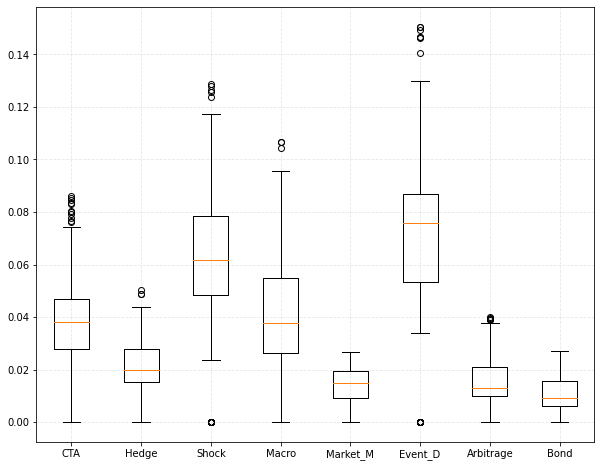

In [88]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,8)) 
ax = fig.add_subplot(1,1,1)
#Variable
ax.boxplot((cta_index['volatility'],dc_index['volatility'],gp_index['volatility'],hg_index['volatility'],mm_index['volatility'],sj_index['volatility'],tl_index['volatility'],zq_index['volatility']),labels=('CTA','Hedge','Shock','Macro','Market_M','Event_D','Arbitrage','Bond'))
plt.grid(linestyle="--", alpha=0.3)
plt.show()

In [105]:
volatility_index=pd.concat([strategy_d['STATISTIC_DATE'],cta_index['rate'],dc_index['rate'],gp_index['rate'],hg_index['rate'],mm_index['rate'],sj_index['rate'],tl_index['rate'],zq_index['rate']],axis=1)
volatility_index.columns=['时间','CTA','Hedge','Shock','Macro','Market_M','Event_D','Arbitrage','Bond']


open_day='2019-07-05'
close_day='2019-10-25'
con1=volatility_index['时间']>=open_day
con2=volatility_index['时间']<=close_day
v=volatility_index[con1&con2]
#fund_2019_day1.columns=['FUND_ID','new_cum_rate']
v

,时间,CTA,Hedge,Shock,Macro,Market_M,Event_D,Arbitrage,Bond
114,2019-07-05,-0.002539,0.005608,0.013462,0.024126,0.001855,0.007742,0.004266,0.002507
115,2019-07-12,0.016298,-0.004721,-0.013681,-0.011262,0.002911,-0.028932,-0.000405,-0.001716
116,2019-07-19,0.007197,-0.001920,0.003534,0.001188,-0.002466,0.004629,-0.000121,-0.001762
117,2019-07-26,-0.011894,0.005624,0.015650,0.007386,-0.000450,0.003285,0.003651,0.002800
118,2019-08-02,0.003676,-0.007723,-0.016786,-0.015761,-0.002049,-0.031880,-0.003741,0.000643
119,2019-08-09,0.016145,-0.004133,-0.016709,-0.021567,0.000324,-0.036818,-0.003992,0.001766
120,2019-08-16,-0.004542,0.003810,0.020191,0.006459,-0.000902,0.010876,0.003748,0.000733
121,2019-08-23,0.001775,0.005771,0.023666,0.009671,0.002753,0.013043,0.001069,0.003100
122,2019-08-30,0.010654,0.002957,-0.002950,0.011277,0.001300,0.019154,-0.000198,0.002191
123,2019-09-06,-0.001996,0.007562,0.033233,0.020661,-0.000602,0.031343,0.006354,0.003070


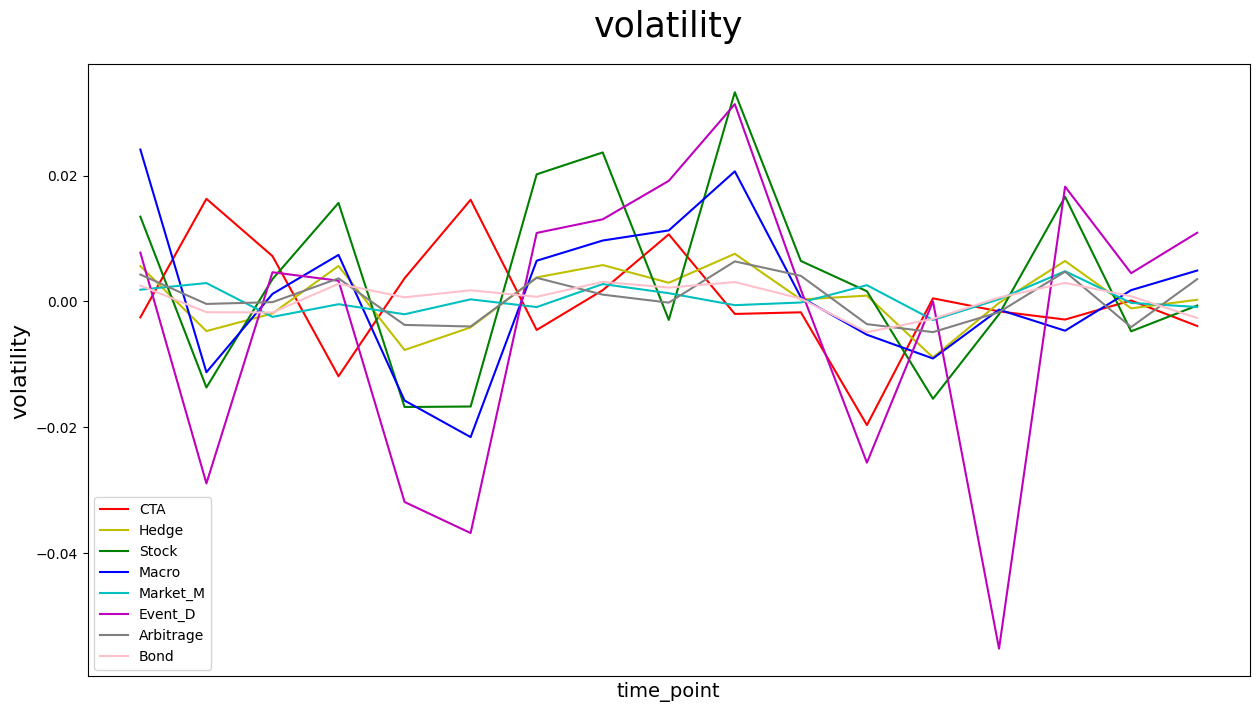

In [106]:
fig = plt.figure(figsize=(15,9), dpi=100)
ax = fig.add_subplot(111)

# X轴时间刻度格式 & 刻度显示
import matplotlib.dates as dt
autodates = dt.AutoDateLocator() # 自动显示x轴时间刻度
ax.xaxis.set_major_locator(autodates) # 设置时间间隔
#ax.xaxis.set_major_formatter(date.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range(v.index[0],v.index[-1],freq='H'), rotation=45)

# 绘图
ax.plot(v.index,v['CTA'],color='r', label='CTA')
ax.plot(v.index,v['Hedge'],color='y', label='Hedge')
ax.plot(v.index,v['Shock'],color='g', label='Stock')
ax.plot(v.index,v['Macro'],color='b', label='Macro')
ax.plot(v.index,v['Market_M'],color='c', label='Market_M')
ax.plot(v.index,v['Event_D'],color='m', label='Event_D')
ax.plot(v.index,v['Arbitrage'],color='gray', label='Arbitrage')
ax.plot(v.index,v['Bond'],color='pink', label='Bond')
# 辅助线
#sup_line = [35 for i in range(480)]
#ax.plot(v.index, sup_line, color='black', linestyle='--', linewidth='1', label='辅助线')

plt.xlabel('time_point', fontsize=14)    # X轴标签
plt.ylabel("volatility", fontsize=16)         # Y轴标签
ax.legend()                              # 图例
plt.title("volatility", fontsize=25, color='black', pad=20)
plt.gcf().autofmt_xdate()
